In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models 
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

y_train is now remain as 2D array. But we dont want that. We need a simple single dimensional array. So we will reshape y_train

In [11]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [14]:
def plot_image(X, y, index): 
  plt.figure(figsize=(5,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

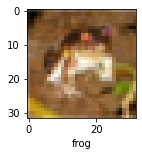

In [15]:
plot_image(X_train, y_train, 0)

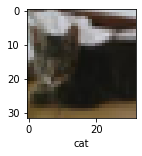

In [16]:
plot_image(X_train, y_train, 9)

In [17]:
X_train = X_train/255
X_test = X_test/255

First we will build a simple ANN(Artificial neural Network) first. Then we will jump to CNN model building

**If our y value is "one hot encoded" then we will use "categorical_crossentropy"
but if y is stored as direct value then we will use "Sparse_categorical_crossentropy"**

In [21]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(32,32,3)), #input_layer
                          keras.layers.Dense(3000, activation='relu'), #hidden_layer
                          keras.layers.Dense(1000, activation='relu'), #hidden_layer
                          keras.layers.Dense(10, activation='sigmoid') #output_layer;; as there is 10 category so we used 10 layer                          
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.9290 - accuracy: 0.3057
Epoch 2/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.6502 - accuracy: 0.4187
Epoch 3/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.5597 - accuracy: 0.4478
Epoch 4/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.4870 - accuracy: 0.4758
Epoch 5/5
1563/1563 [==============================] - 101s 64ms/step - loss: 1.4287 - accuracy: 0.4987


In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 8s 24ms/step - loss: 1.5200 - accuracy: 0.4582


[1.5200086832046509, 0.45820000767707825]

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
y_pred_classses = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classses))

Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.55      0.57      1000
           1       0.57      0.66      0.61      1000
           2       0.34      0.33      0.34      1000
           3       0.37      0.14      0.21      1000
           4       0.34      0.53      0.41      1000
           5       0.36      0.42      0.38      1000
           6       0.62      0.31      0.41      1000
           7       0.37      0.76      0.50      1000
           8       0.70      0.50      0.58      1000
           9       0.70      0.39      0.50      1000

    accuracy                           0.46     10000
   macro avg       0.49      0.46      0.45     10000
weighted avg       0.49      0.46      0.45     10000



Now we will implement the model using CNN

In [32]:
model_CNN = keras.Sequential([
                              #cnn
                              layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
                              layers.MaxPooling2D((2,2)),

                              layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu'),
                              layers.MaxPooling2D((2,2)),

                              #dense
                              layers.Flatten(),
                              layers.Dense(64, activation='relu'),
                              layers.Dense(10, activation='softmax')                        
])

In [33]:
model_CNN.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [34]:
model_CNN.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 53s 34ms/step - loss: 2.1522 - accuracy: 0.2073
Epoch 2/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.6859 - accuracy: 0.3994
Epoch 3/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.4706 - accuracy: 0.4788
Epoch 4/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.3580 - accuracy: 0.5172
Epoch 5/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.2746 - accuracy: 0.5515
Epoch 6/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.2105 - accuracy: 0.5736
Epoch 7/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.1553 - accuracy: 0.5977
Epoch 8/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.1048 - accuracy: 0.6111
Epoch 9/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.0510 - accuracy: 0.6349
Epoch 10/10
1563/1563 [==============================] - 53s 34m

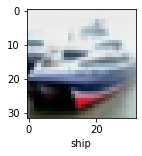

In [36]:
y_test = y_test.reshape(-1,)
plot_image(X_test, y_test, 1)

In [38]:
y_pred = model_CNN.predict(X_test)
y_pred[:5]

array([[3.0310752e-03, 2.8003295e-04, 2.4241325e-02, 6.4282954e-01,
        3.7457743e-03, 1.8466192e-01, 1.3327076e-01, 1.0355130e-03,
        5.3758794e-03, 1.5281889e-03],
       [8.9963168e-02, 2.6530254e-01, 3.7855520e-05, 3.4237826e-05,
        2.7377985e-04, 7.7324961e-07, 1.3728056e-06, 3.7209811e-05,
        4.7484136e-01, 1.6950773e-01],
       [1.4425126e-01, 2.2514775e-01, 1.3627938e-03, 1.4607167e-03,
        1.8341150e-03, 1.2033354e-04, 5.3282519e-04, 2.9977522e-04,
        5.1973832e-01, 1.0525203e-01],
       [6.0962391e-01, 1.6477263e-02, 9.4330125e-03, 1.2674193e-03,
        4.8841448e-03, 3.1232779e-05, 5.5174838e-04, 9.4252650e-04,
        3.5182583e-01, 4.9629970e-03],
       [4.3734733e-05, 3.5817720e-04, 3.6041163e-02, 9.8575965e-02,
        5.0860882e-01, 5.2395482e-02, 3.0301839e-01, 2.6809250e-04,
        3.2992018e-04, 3.6028103e-04]], dtype=float32)

In [39]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]
              

[3, 8, 8, 0, 4]

In [40]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model_CNN.predict(X_test)
y_pred_classses = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classses))

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.68      0.67      1000
           1       0.74      0.72      0.73      1000
           2       0.54      0.44      0.48      1000
           3       0.46      0.43      0.45      1000
           4       0.62      0.43      0.51      1000
           5       0.59      0.48      0.53      1000
           6       0.53      0.88      0.66      1000
           7       0.74      0.66      0.70      1000
           8       0.73      0.77      0.75      1000
           9       0.65      0.74      0.69      1000

    accuracy                           0.62     10000
   macro avg       0.63      0.62      0.62     10000
weighted avg       0.63      0.62      0.62     10000

